In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [9]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates = ['Date'])
df

Province/State         Country/Region        Lat       Long       Date  \
0                NaN            Afghanistan  33.939110  67.709953 2020-01-22   
1                NaN                Albania  41.153300  20.168300 2020-01-22   
2                NaN                Algeria  28.033900   1.659600 2020-01-22   
3                NaN                Andorra  42.506300   1.521800 2020-01-22   
4                NaN                 Angola -11.202700  17.873900 2020-01-22   
...              ...                    ...        ...        ...        ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065            NaN                Comoros -11.645500  43.333300 2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600 2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [11]:
df["Active"]=df["Confirmed"]-df["Deaths"]-df["Recovered"]


In [13]:
#Renaming the columns   
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered",
                   "WHO Region":"who",
                   "Active":"active"
                   },inplace = True)

In [15]:
df.head()

state      country       lat       long       date  confirmed  deaths  \
0   NaN  Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300 2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600 2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800 2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900 2020-01-22          0       0   

   recovered  active                    who  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [25]:
# combining the latest data for the countries 
top = df[df["date"] == df["date"].max()]
world = top.groupby("country")[["confirmed","active","deaths","recovered"]].sum().reset_index()
world.head()

country  confirmed  active  deaths  recovered
0  Afghanistan      36263    9796    1269      25198
1      Albania       4880    1991     144       2745
2      Algeria      27973    7973    1163      18837
3      Andorra        907      52      52        803
4       Angola        950     667      41        242

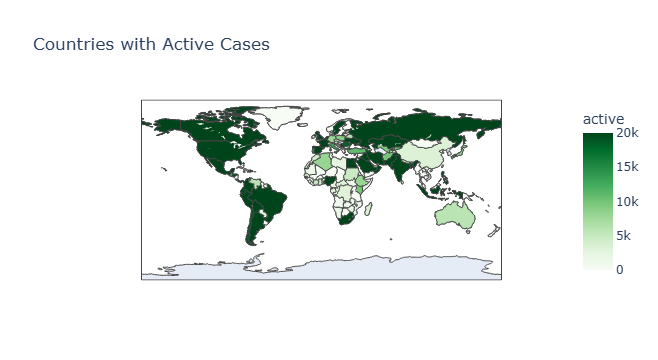

In [27]:
# Top countries having highest no. of active case

figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="active",
                       hover_name="country",range_color=[1,20000],
                       color_continuous_scale="greens",
                       title="Countries with Active Cases")
figure.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      14664 non-null  object        
 1   country    49068 non-null  object        
 2   lat        49068 non-null  float64       
 3   long       49068 non-null  float64       
 4   date       49068 non-null  datetime64[ns]
 5   confirmed  49068 non-null  int64         
 6   deaths     49068 non-null  int64         
 7   recovered  49068 non-null  int64         
 8   active     49068 non-null  int64         
 9   who        49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [41]:
# Determine the Total Confimed Cases grouped by Date
total_cases = df.groupby("date")[['confirmed']].sum().reset_index()
total_cases

date  confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

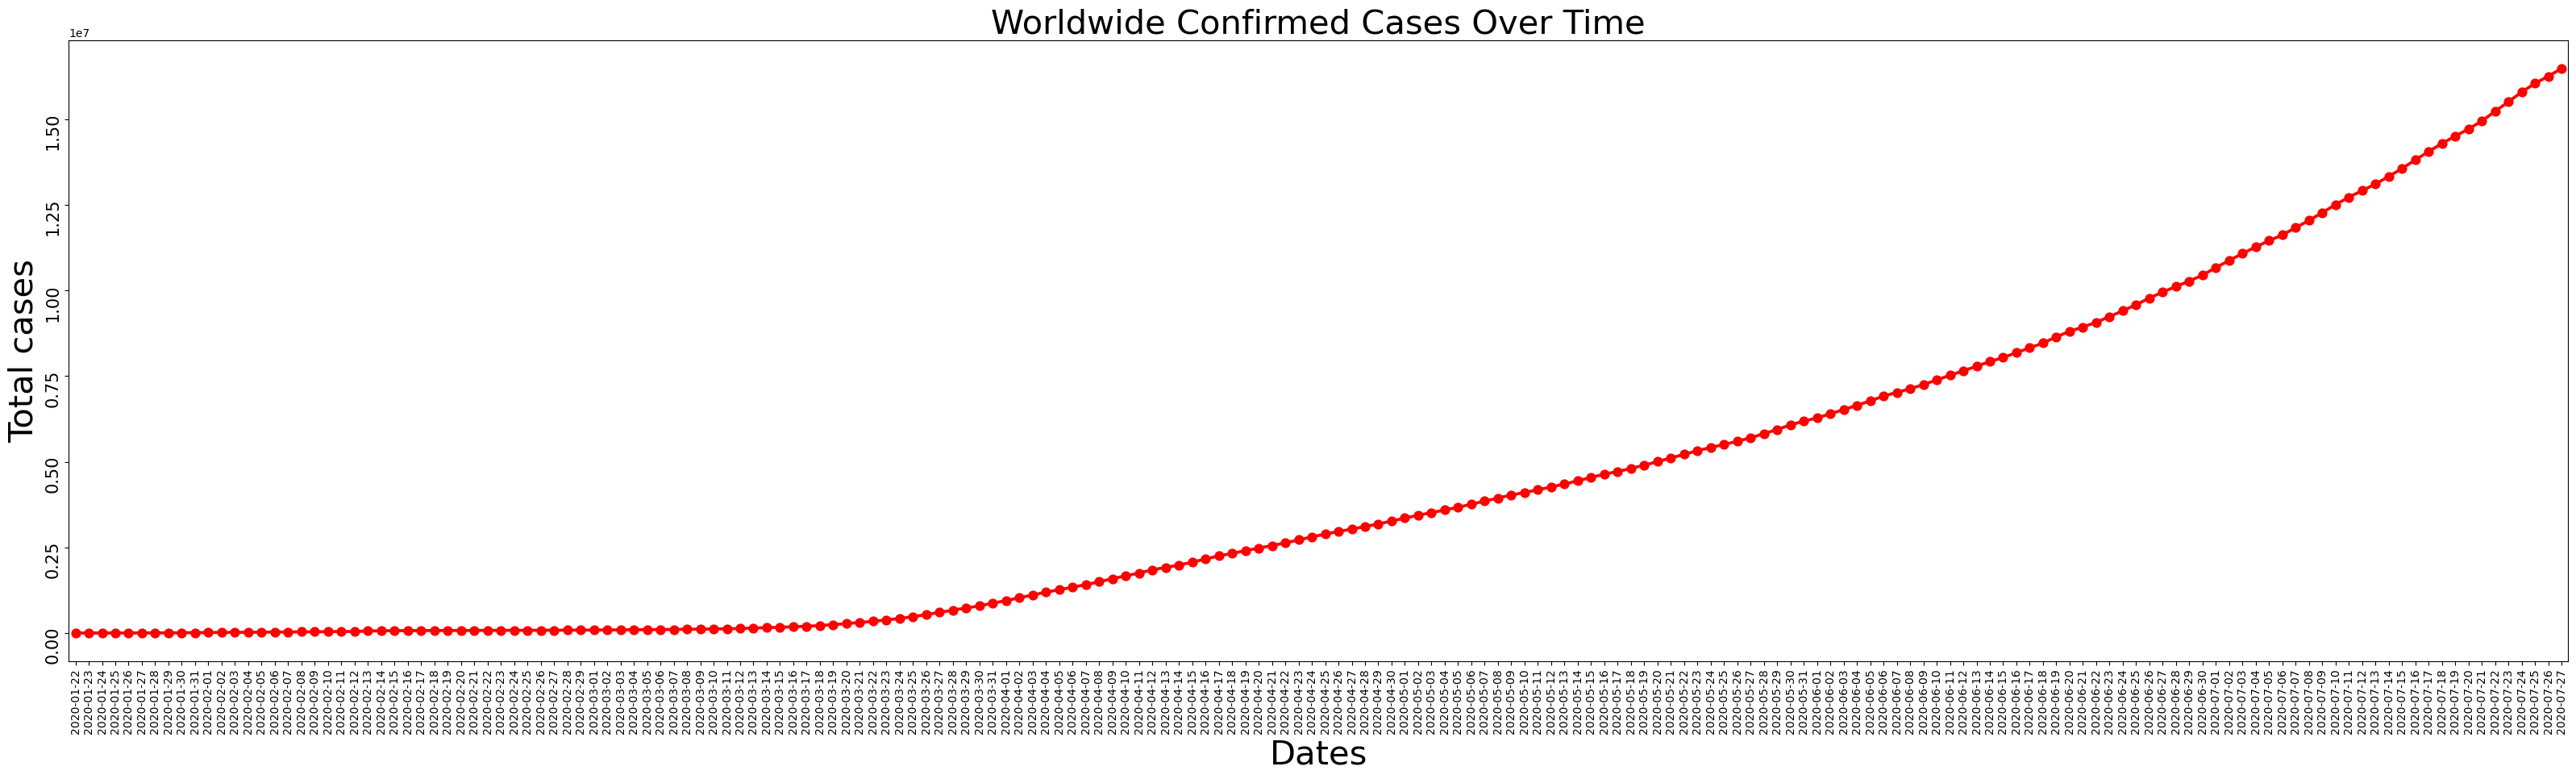

In [43]:
# Observe the trend in the confirmed cases
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(40,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation =90,fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

In [49]:
# Current Top Countries having most Active Cases
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending=False).head(20).reset_index()


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

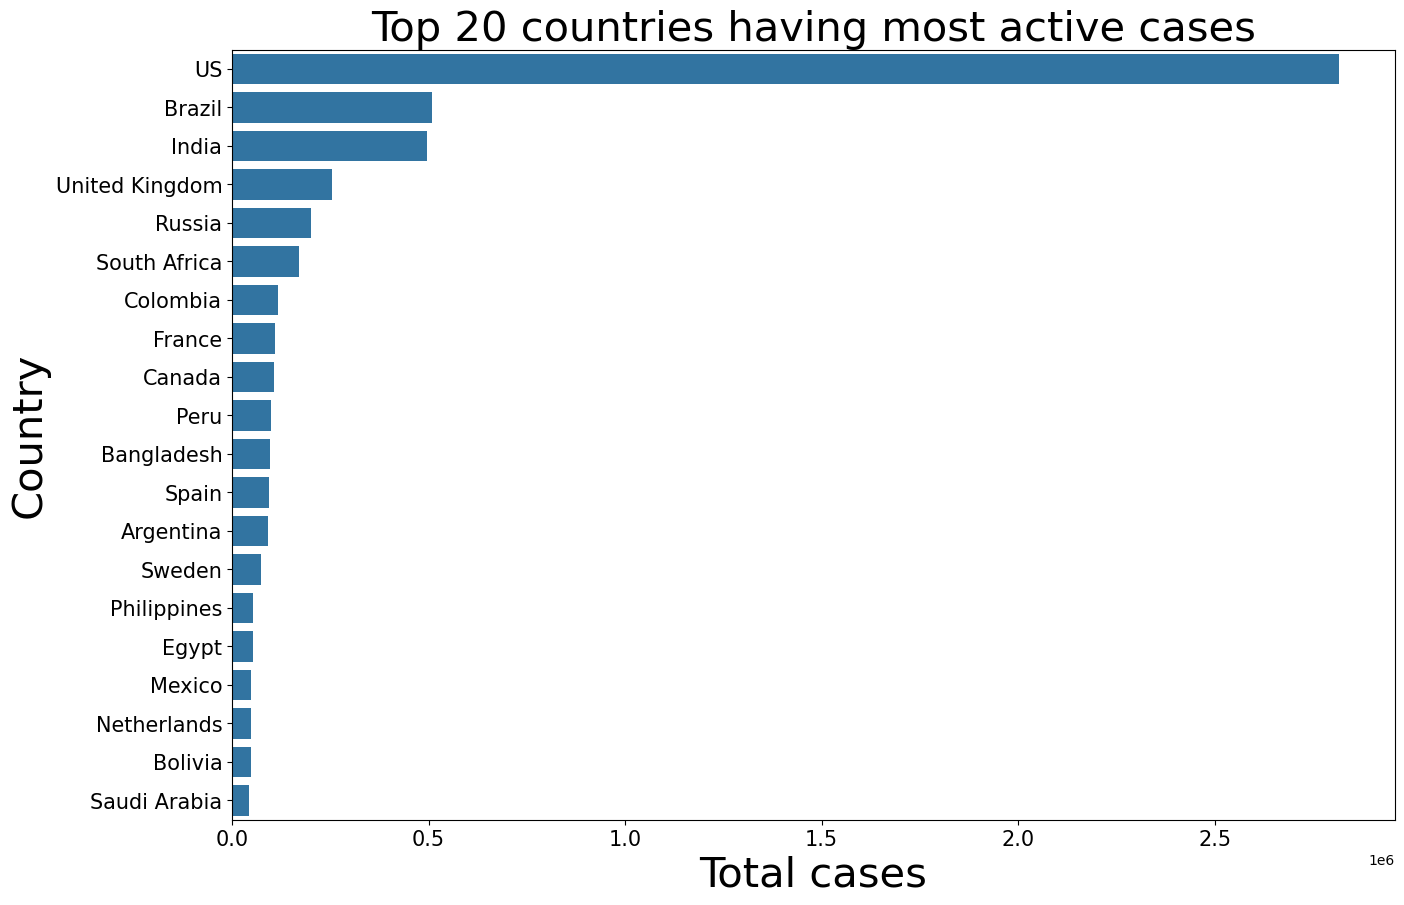

In [53]:

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active, y=top_actives.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [57]:
# top 20 countries with highest number of Death cases

top_deaths = top.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

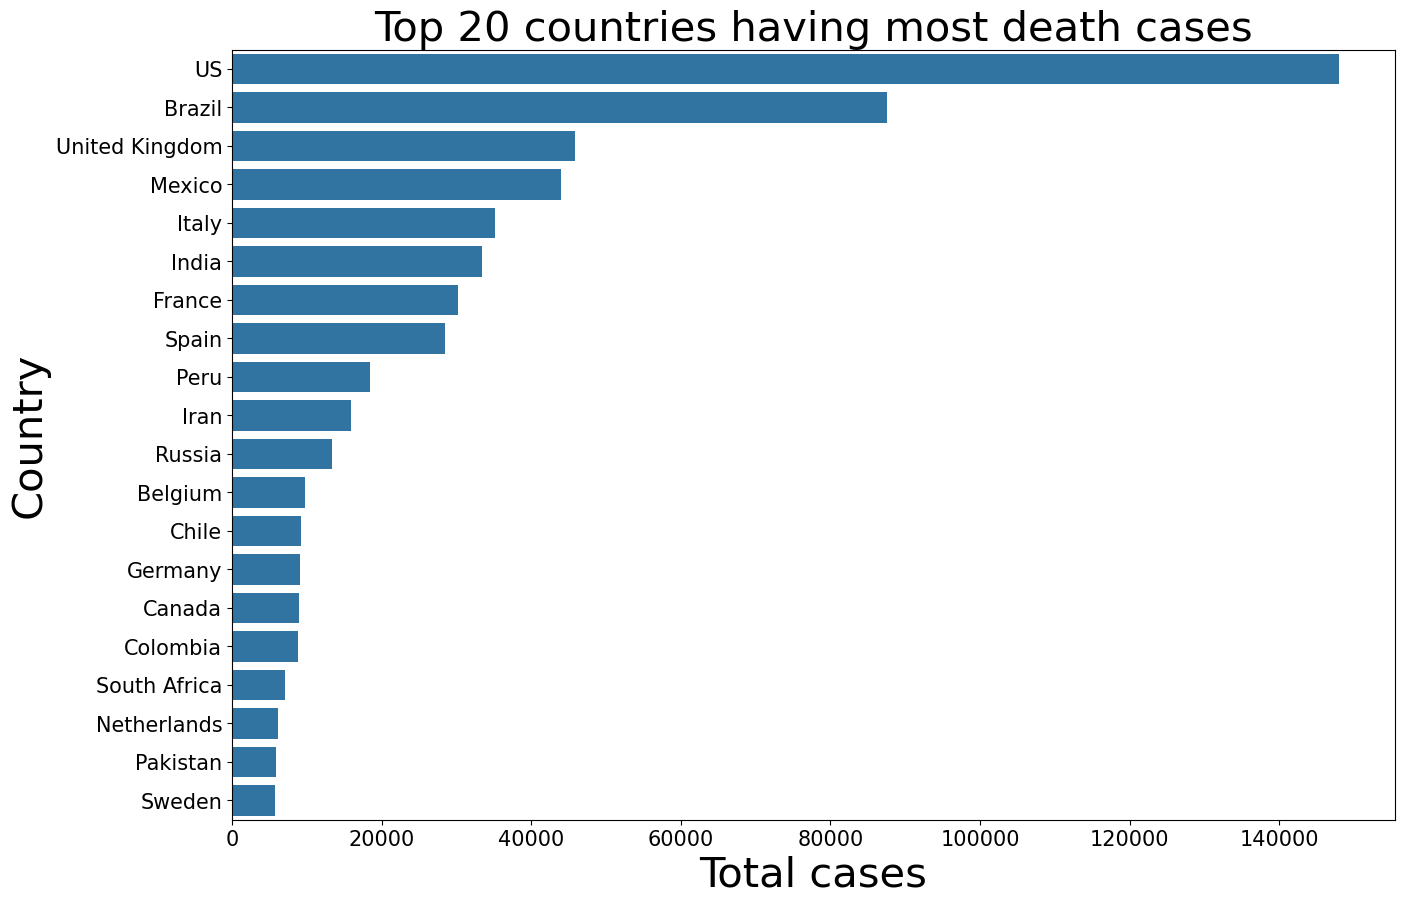

In [59]:

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [66]:

#Top 5 countries with most active cases
#US
#Brazil
#India 
#United Kingdom
#Russia


In [68]:
# Analysis of Top 5 Countries

In [74]:
us = df[df.country == "US"]
us = us.groupby(by ="date")[["recovered","deaths","confirmed","active"]].sum().reset_index()
us = us.iloc[33:].reset_index().drop("index",axis=1)
us.head()


date  recovered  deaths  confirmed  active
0 2020-02-24          5       0         15      10
1 2020-02-25          6       0         15       9
2 2020-02-26          6       0         15       9
3 2020-02-27          6       0         16      10
4 2020-02-28          7       0         16       9

In [76]:
brazil = df[df.country == "Brazil"]
brazil = brazil.groupby(by = "date")[["recovered","deaths","confirmed","active"]].sum().reset_index()
brazil.head()


date  recovered  deaths  confirmed  active
0 2020-01-22          0       0          0       0
1 2020-01-23          0       0          0       0
2 2020-01-24          0       0          0       0
3 2020-01-25          0       0          0       0
4 2020-01-26          0       0          0       0

In [78]:
uk = df[df.country == "United Kingdom"]
uk = uk.groupby(by ="date")[["recovered","deaths","confirmed","active"]].sum().reset_index()
uk = uk.iloc[10:].reset_index().drop("index",axis=1)
uk.head()

date  recovered  deaths  confirmed  active
0 2020-02-01          0       0          2       2
1 2020-02-02          0       0          2       2
2 2020-02-03          0       0          8       8
3 2020-02-04          0       0          8       8
4 2020-02-05          0       0          9       9

In [80]:
india = df[df.country == "India"]
india= india.groupby(by ="date")[["recovered","deaths","confirmed","active"]].sum().reset_index()
india= india.iloc[9:].reset_index().drop("index",axis=1)
india.head()

date  recovered  deaths  confirmed  active
0 2020-01-31          0       0          1       1
1 2020-02-01          0       0          1       1
2 2020-02-02          0       0          2       2
3 2020-02-03          0       0          3       3
4 2020-02-04          0       0          3       3

In [90]:
Russia = df[df.country == "Russia"]
Russia= india.groupby(by ="date")[["recovered","deaths","confirmed","active"]].sum().reset_index()
Russia= india.iloc[10:].reset_index().drop("index",axis=1)
Russia.head()

date  recovered  deaths  confirmed  active
0 2020-02-10          0       0          3       3
1 2020-02-11          0       0          3       3
2 2020-02-12          0       0          3       3
3 2020-02-13          0       0          3       3
4 2020-02-14          0       0          3       3

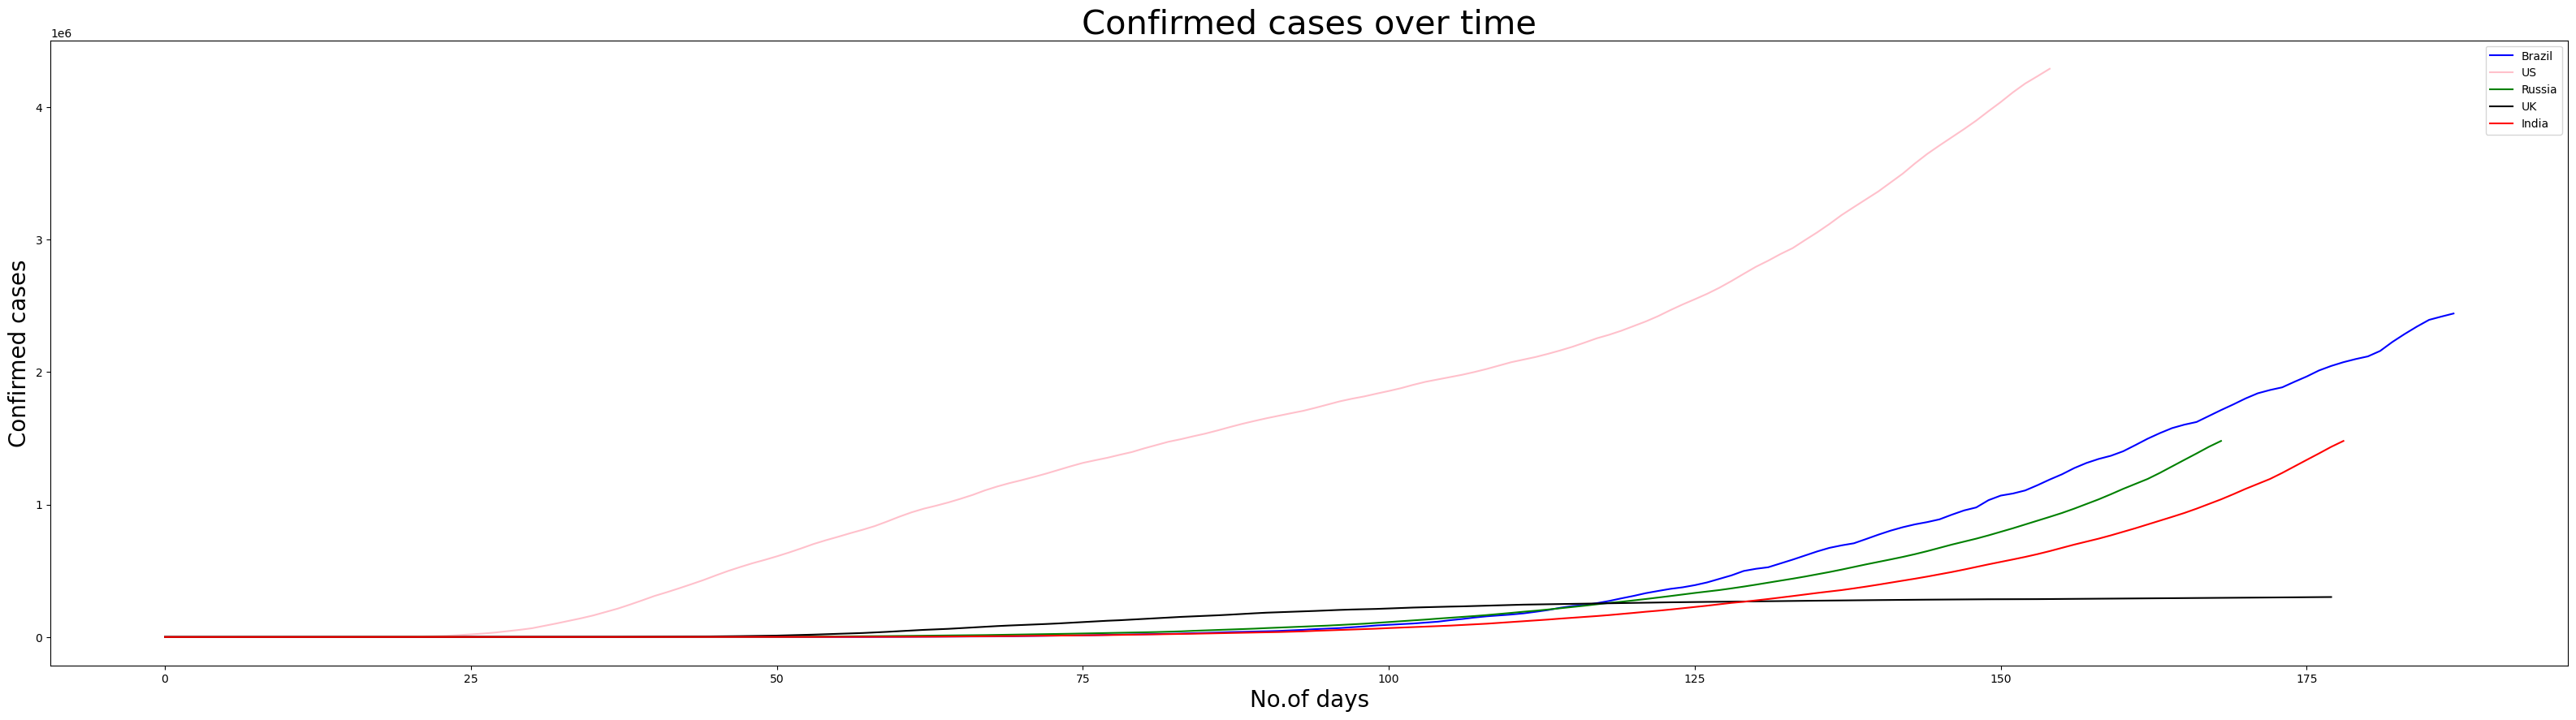

In [92]:
# confirmed cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.lineplot(x=brazil.index, y=brazil['confirmed'], label='Brazil', color="Blue")
sns.lineplot(x=us.index, y=us['confirmed'], label='US', color="Pink")
sns.lineplot(x=Russia.index, y=Russia['confirmed'], label='Russia', color="Green")
sns.lineplot(x=uk.index, y=uk['confirmed'], label='UK', color="Black")
sns.lineplot(x=india.index, y=india['confirmed'], label='India', color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

In [96]:
# In US we can see the drastically increasing number of confirmed cases 

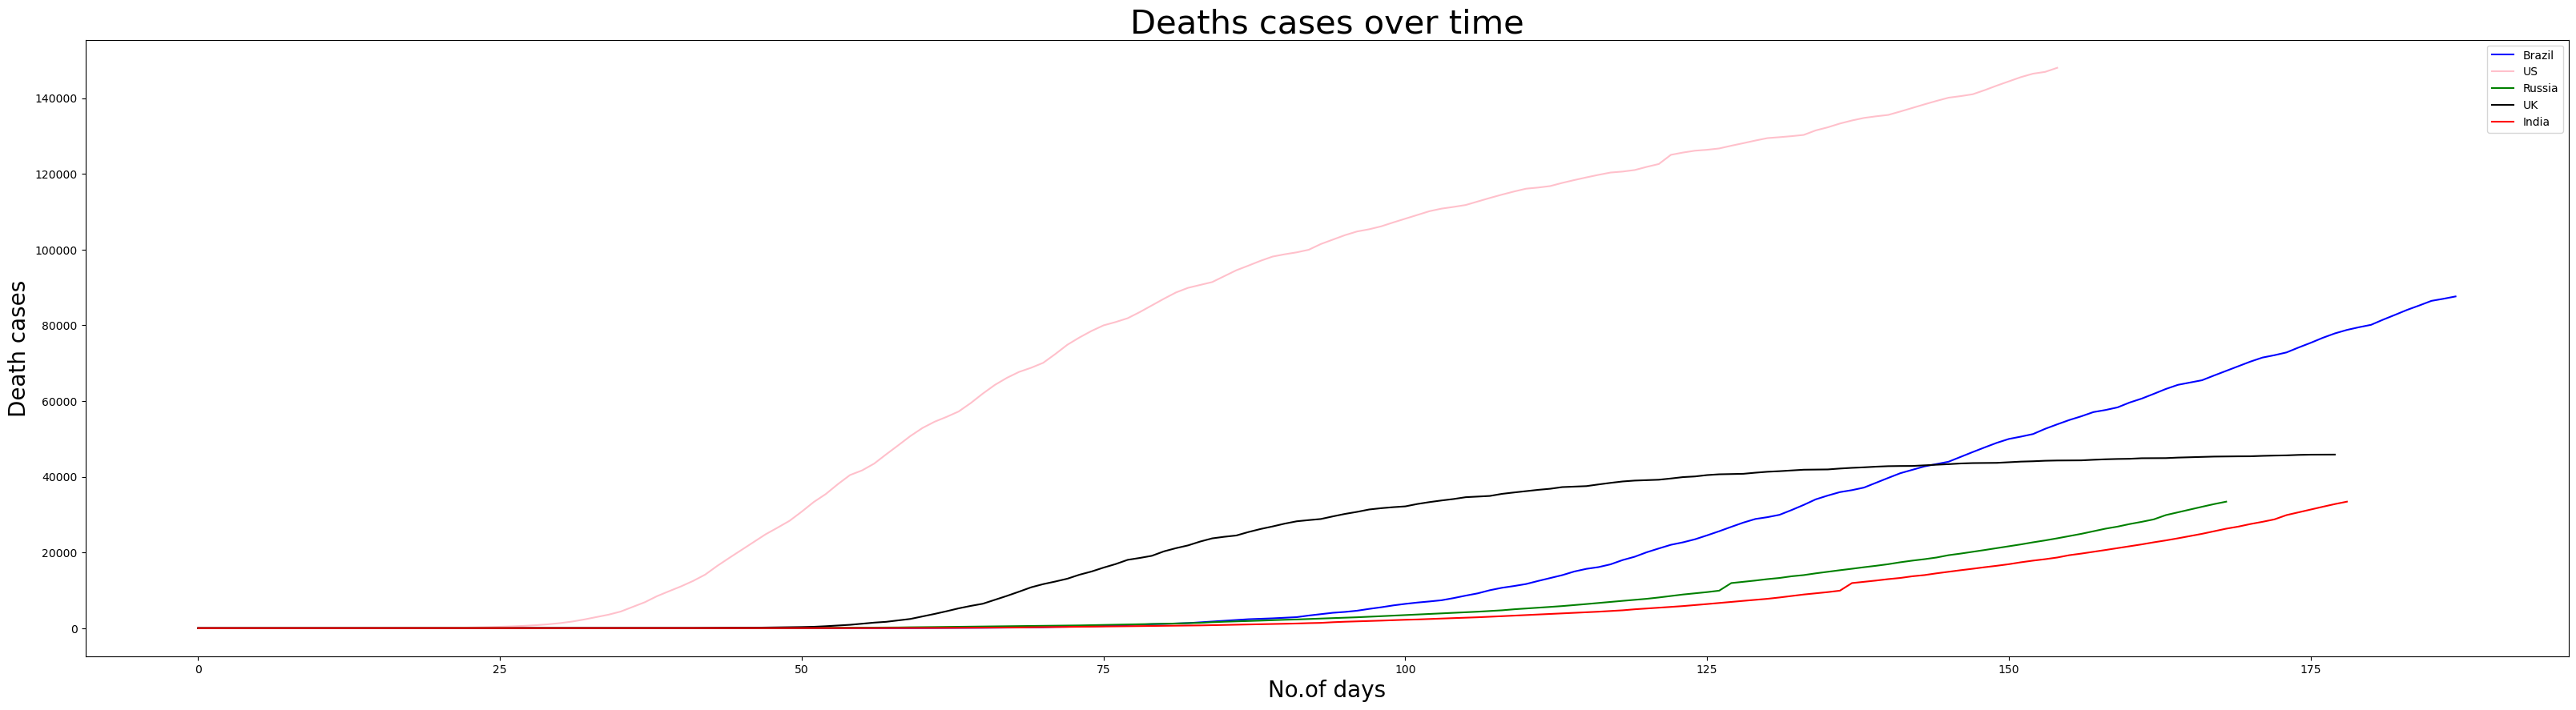

In [112]:

# Death cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.lineplot(x=brazil.index, y=brazil['deaths'], label='Brazil', color="Blue")
sns.lineplot(x=us.index, y=us['deaths'], label='US', color="Pink")
sns.lineplot(x=Russia.index, y=Russia['deaths'], label='Russia', color="Green")
sns.lineplot(x=uk.index, y=uk['deaths'], label='UK', color="Black")
sns.lineplot(x=india.index, y=india['deaths'], label='India', color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Death cases',fontsize=20)
plt.title('Deaths cases over time',fontsize=30)
plt.show()

In [102]:
# Death case of US is highest 

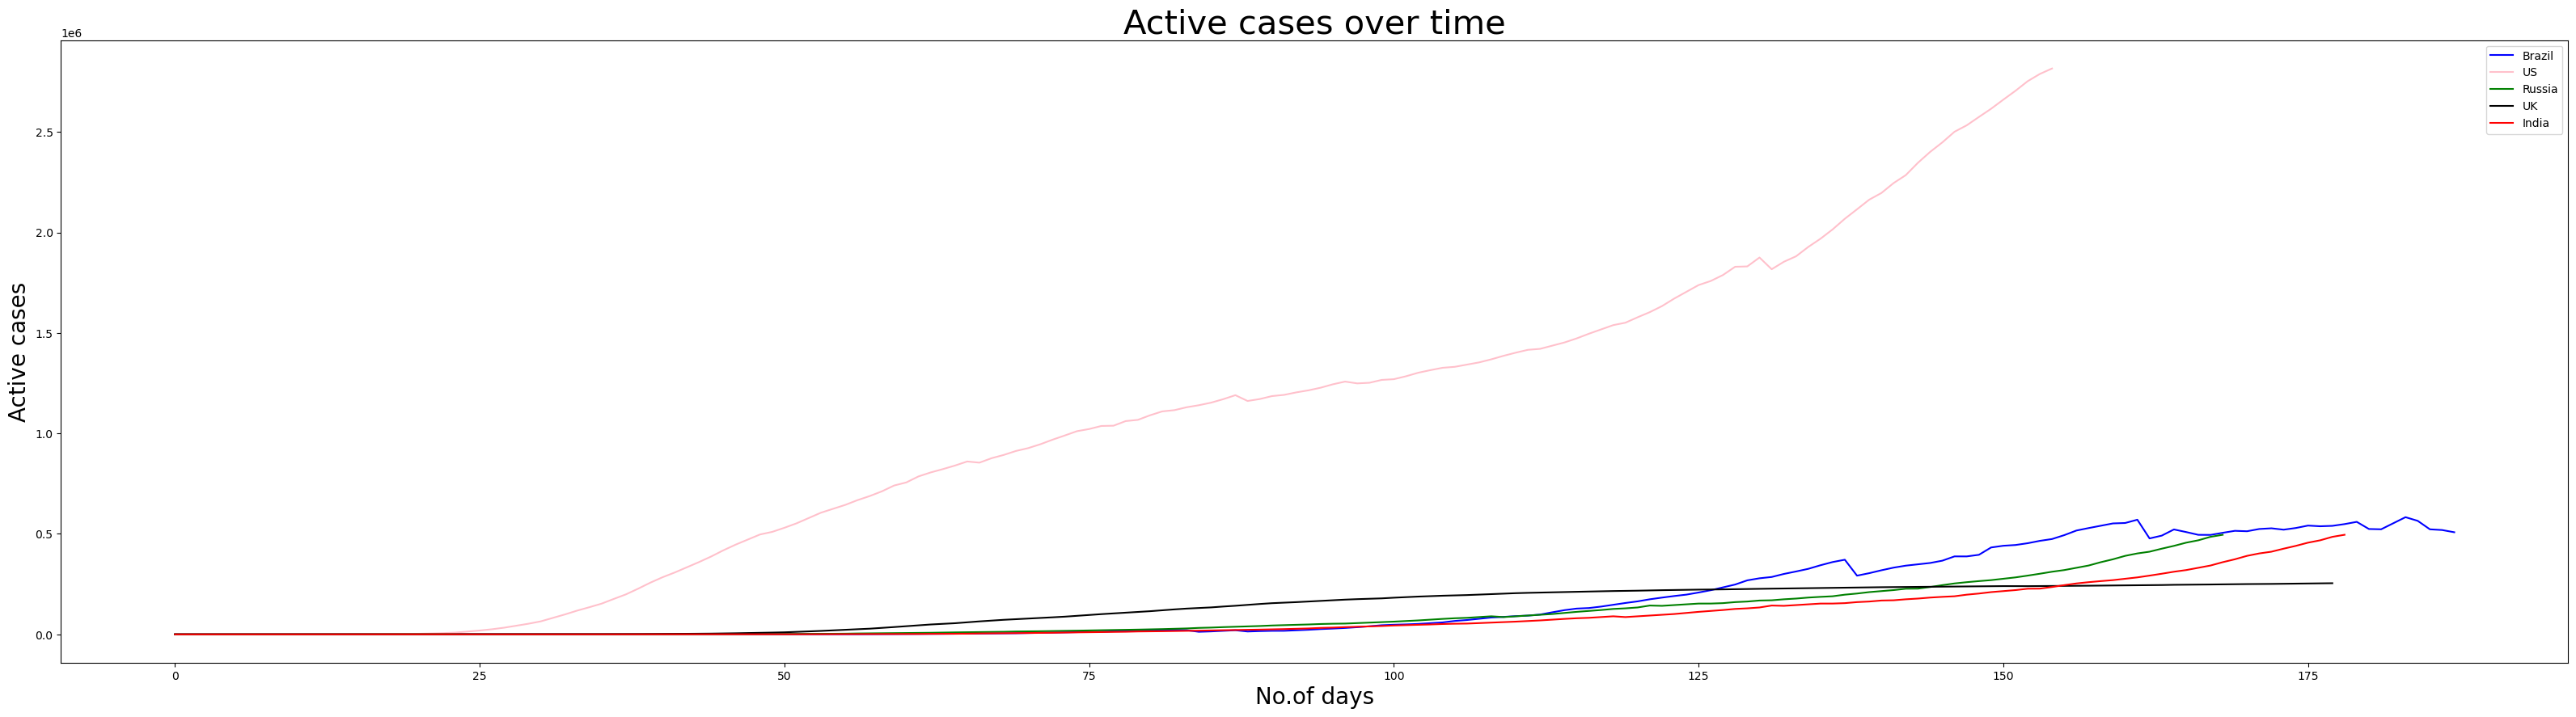

In [114]:
# active cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.lineplot(x=brazil.index, y=brazil['active'], label='Brazil', color="Blue")
sns.lineplot(x=us.index, y=us['active'], label='US', color="Pink")
sns.lineplot(x=Russia.index, y=Russia['active'], label='Russia', color="Green")
sns.lineplot(x=uk.index, y=uk['active'], label='UK', color="Black")
sns.lineplot(x=india.index, y=india['active'], label='India', color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Active cases',fontsize=20)
plt.title('Active cases over time',fontsize=30)
plt.show()

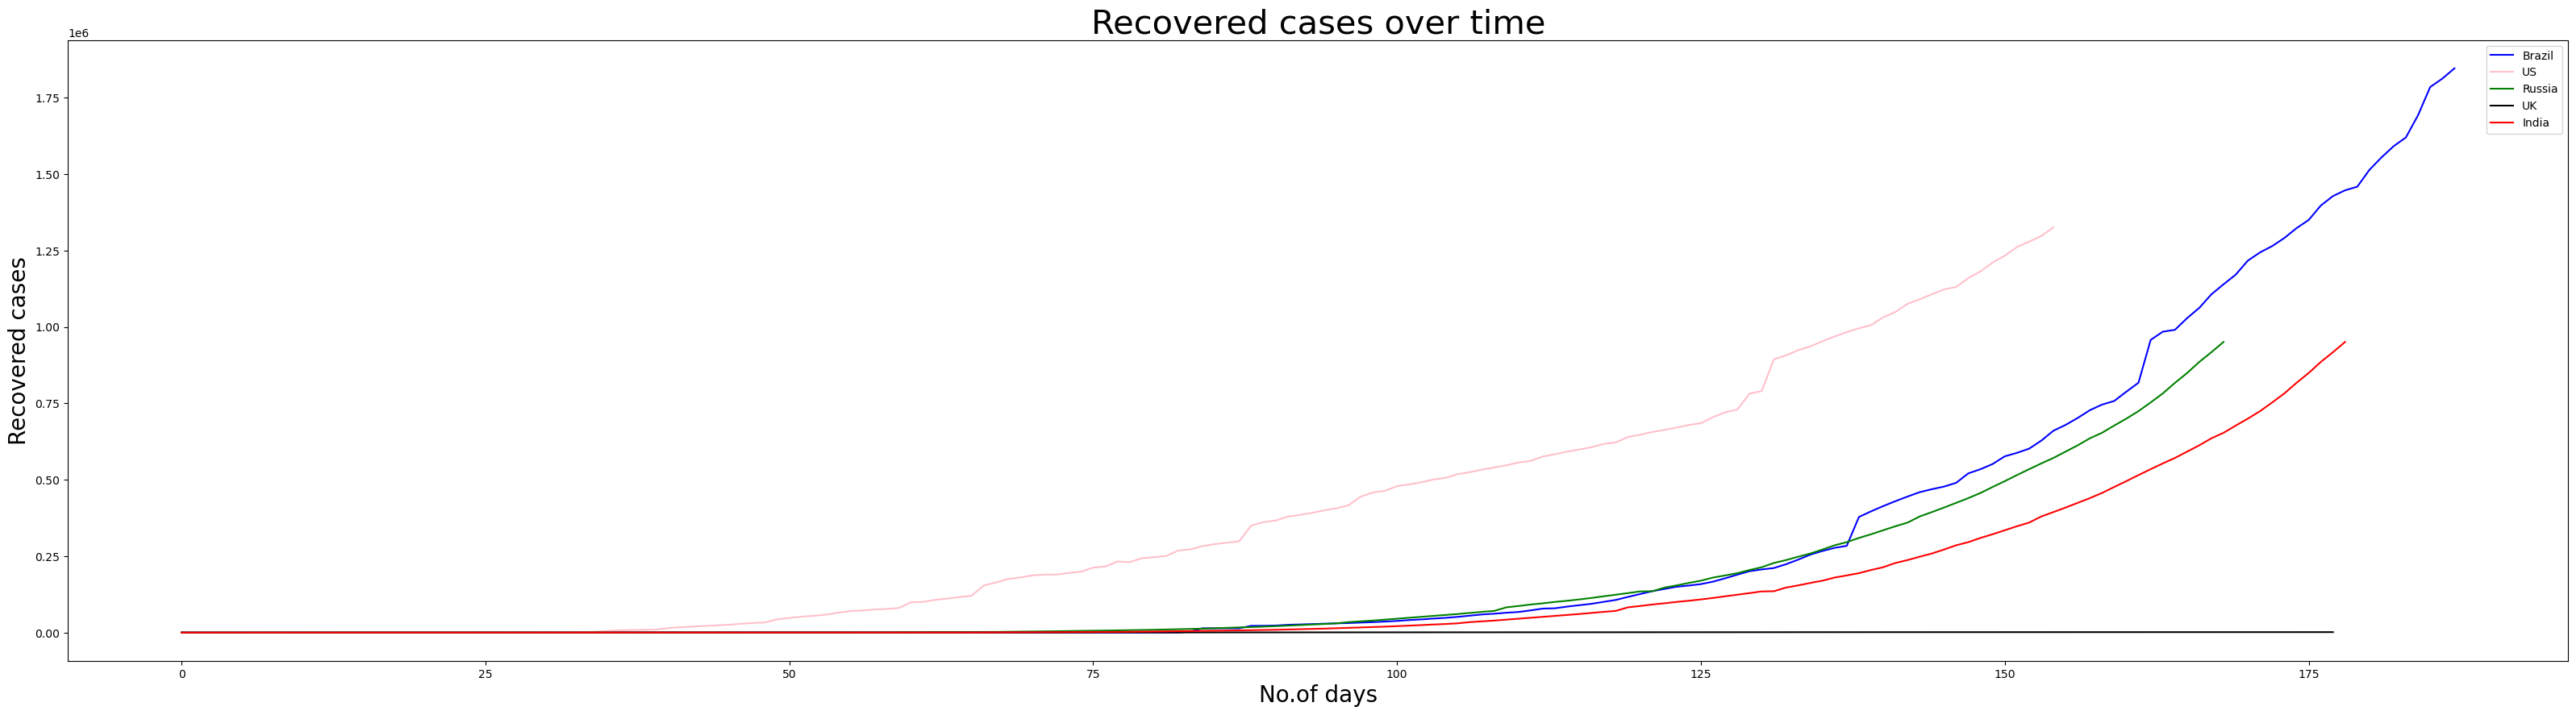

In [116]:
# recovered cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.lineplot(x=brazil.index, y=brazil['recovered'], label='Brazil', color="Blue")
sns.lineplot(x=us.index, y=us['recovered'], label='US', color="Pink")
sns.lineplot(x=Russia.index, y=Russia['recovered'], label='Russia', color="Green")
sns.lineplot(x=uk.index, y=uk['recovered'], label='UK', color="Black")
sns.lineplot(x=india.index, y=india['recovered'], label='India', color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Recovered cases',fontsize=20)
plt.title('Recovered cases over time',fontsize=30)
plt.show()

# Model building using Facebook Prophet Library

In [121]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 991.0 kB/s eta 0:00:14
   ---------------------------------------- 0.1/13.3 MB 919.0 kB/s eta 0:00:15
   ---------------------------------------- 0.1/13.3 MB 845.5 kB/s eta 0:00:16
   ---------------------------------------- 0.1/13.3 MB 714.4 kB/s eta 0:00:19
   ---------------------------------------- 0.2/13.3 MB 756.6 kB/s eta 0:00:18
    --------------------------------------- 0.2/13.3 MB 772.8 kB/s eta 0:00:17
    --------------------------------------- 0.2/13.3 MB 772.8 kB/s eta 0:00:17
    --------------------------------------- 0.2/13.3 MB 656.0 kB/s eta 0:00:20
    --------------------------------------- 0.3/13.3 MB 679.4 kB/s eta 0:00:20
    --------------------------------------- 0.3/13.3 MB 700.8 kB/s eta 0:00:19
   - -------------------------------------- 0.4/13.3 MB 715.8 kB/s eta

In [123]:
from prophet import Prophet

In [125]:
data = pd.read_csv("covid_19_clean_complete.csv", parse_dates = ["Date"])
data

Province/State         Country/Region        Lat       Long       Date  \
0                NaN            Afghanistan  33.939110  67.709953 2020-01-22   
1                NaN                Albania  41.153300  20.168300 2020-01-22   
2                NaN                Algeria  28.033900   1.659600 2020-01-22   
3                NaN                Andorra  42.506300   1.521800 2020-01-22   
4                NaN                 Angola -11.202700  17.873900 2020-01-22   
...              ...                    ...        ...        ...        ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065            NaN                Comoros -11.645500  43.333300 2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600 2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [131]:
data["Active"] = data["Confirmed"] - data["Deaths"] - data["Recovered"]

In [133]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
deaths = data.groupby('Date').sum()['Deaths'].reset_index()
recovered = data.groupby('Date').sum()['Recovered'].reset_index()

In [137]:
confirmed.head()

Date  Confirmed
0 2020-01-22        555
1 2020-01-23        654
2 2020-01-24        941
3 2020-01-25       1434
4 2020-01-26       2118

In [139]:
# convert the column names to "ds" and "y"  ds(datastamp) and y(Target)
# its the basic requirement of fb prophet model to change column names

In [150]:
# For building a forecasting model using fbProphet library,
# there should be only 2 columns passed
# The column names should always be --> 'ds','y'
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

ds         y
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

In [143]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
deaths.head()

ds   y
0 2020-01-22  17
1 2020-01-23  18
2 2020-01-24  26
3 2020-01-25  42
4 2020-01-26  56

In [145]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
recovered.head()

ds   y
0 2020-01-22  28
1 2020-01-23  30
2 2020-01-24  36
3 2020-01-25  39
4 2020-01-26  52

# Making forecasting of confirmed cases

In [152]:
model = Prophet(interval_width = 0.95)
model.fit(confirmed)
future = model.make_future_dataframe(periods = 7, freq = 'D')
future.tail()

19:20:34 - cmdstanpy - INFO - Chain [1] start processing
19:20:34 - cmdstanpy - INFO - Chain [1] done processing


ds
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [154]:
forecast = model.predict(future)

In [156]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.632401e+07  1.617640e+07  1.648367e+07
189 2020-07-29  1.653405e+07  1.638178e+07  1.670442e+07
190 2020-07-30  1.674820e+07  1.658234e+07  1.690440e+07
191 2020-07-31  1.696362e+07  1.678608e+07  1.713655e+07
192 2020-08-01  1.717143e+07  1.700316e+07  1.733541e+07
193 2020-08-02  1.736922e+07  1.719751e+07  1.754299e+07
194 2020-08-03  1.756410e+07  1.737576e+07  1.774428e+07

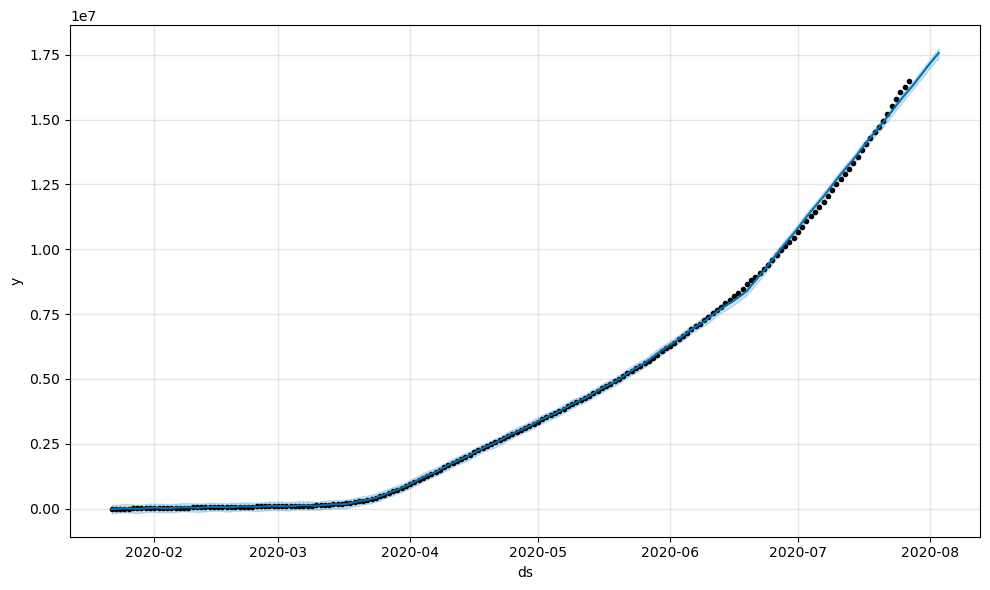

In [158]:
confirmed_forecasting_plot = model.plot(forecast)

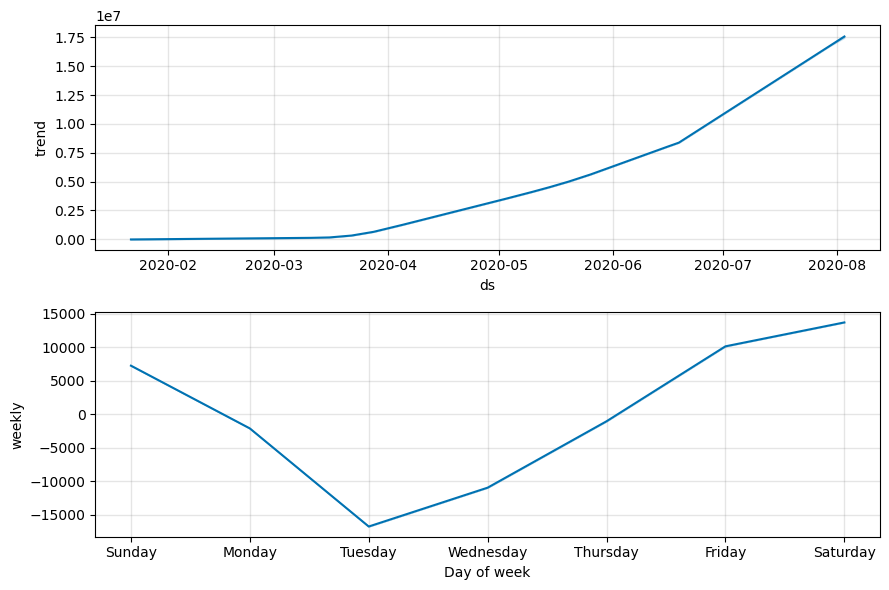

In [160]:
confirmed_forecasting_plot1 = model.plot_components(forecast)

# Making forecasting of Death cases

In [163]:
m=Prophet(interval_width=0.95)
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail(7)

19:24:09 - cmdstanpy - INFO - Chain [1] start processing
19:24:09 - cmdstanpy - INFO - Chain [1] done processing


ds
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [165]:
forecast=m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds           yhat     yhat_lower     yhat_upper
190 2020-07-30  663521.743356  660375.166564  666635.454330
191 2020-07-31  669038.962960  665485.519322  672611.948942
192 2020-08-01  673922.465056  669689.938403  677955.396534
193 2020-08-02  678060.469456  672991.383131  682773.708892
194 2020-08-03  682351.854619  675595.763195  687763.839154

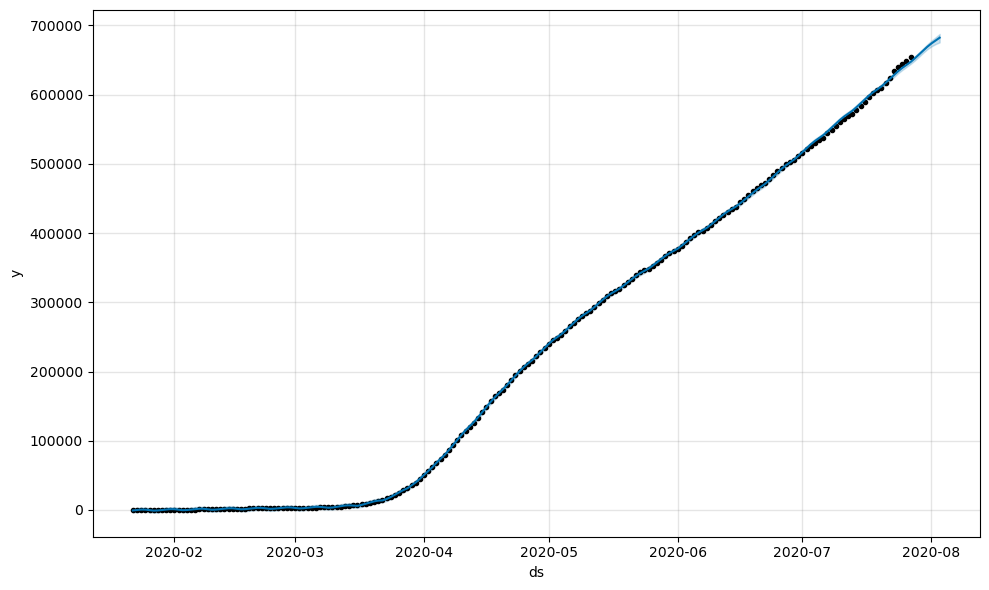

In [167]:
deaths_forecasting_plot=m.plot(forecast)

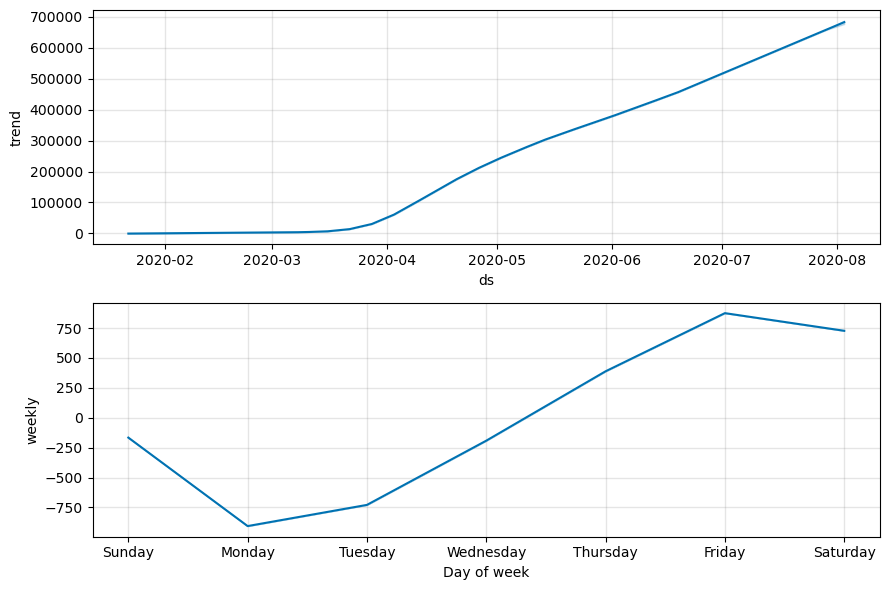

In [169]:
deaths_forecasting_plot1=m.plot_components(forecast)

# Making forecast of recovery

In [172]:
md = Prophet(interval_width = 0.95)
md.fit(recovered)
future = md.make_future_dataframe(periods = 7, freq = 'D')
future.tail(10)

19:29:42 - cmdstanpy - INFO - Chain [1] start processing
19:29:42 - cmdstanpy - INFO - Chain [1] done processing


ds
185 2020-07-25
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [174]:
forecast = md.predict(future)

In [176]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
190 2020-07-30  9.596422e+06  9.473230e+06  9.723332e+06
191 2020-07-31  9.737858e+06  9.622264e+06  9.856184e+06
192 2020-08-01  9.878073e+06  9.757418e+06  1.000979e+07
193 2020-08-02  1.000410e+07  9.883591e+06  1.012820e+07
194 2020-08-03  1.014058e+07  1.001440e+07  1.028288e+07

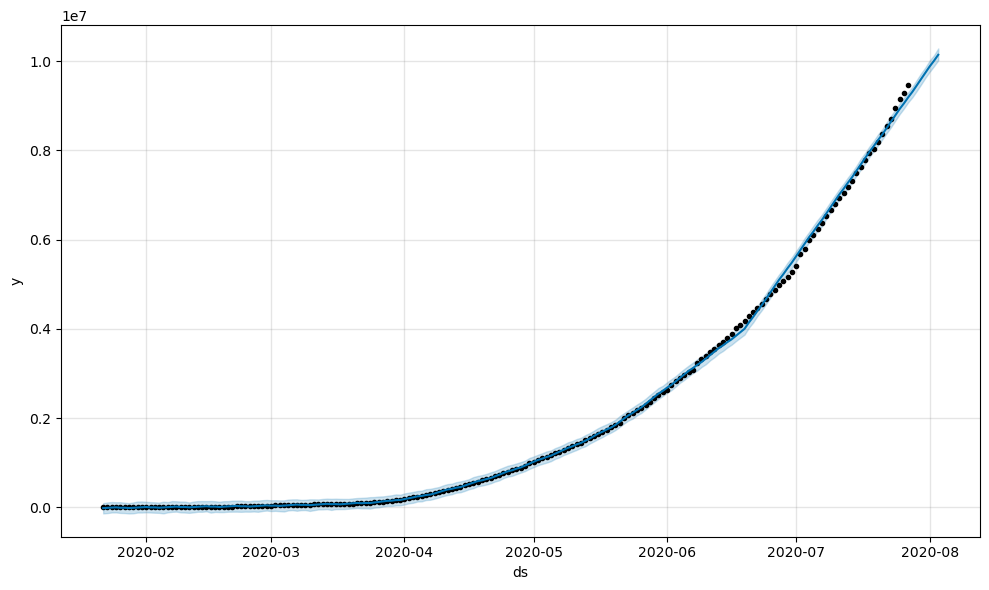

In [178]:
recovered_forecasting_plot = md.plot(forecast)

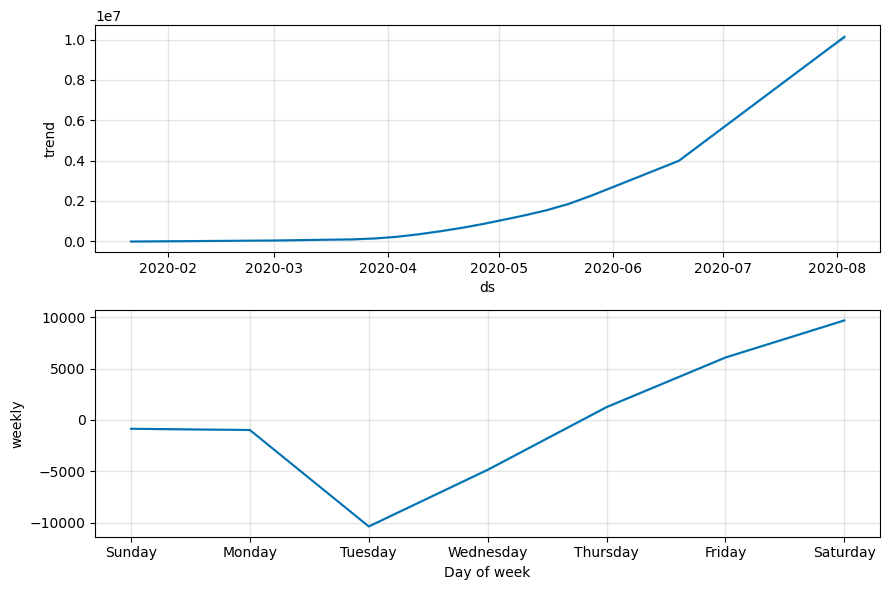

In [182]:
recovered_forecasting_plot1 = md.plot_components(forecast)

# Detailed Analysis of Covid Cases in India

In [191]:
df_india = pd.read_excel('covid_19_india.xlsx')
df_india

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0        1     Andhra Pradesh                                        9   
1        2              Bihar                                        3   
2        3       Chhattisgarh                                        1   
3        4              Delhi                                       30   
4        5            Gujarat                                       32   
5        6            Haryana                                       14   
6        7   Himachal Pradesh                                        3   
7        8          Karnataka                                       41   
8        9             Kerala                                      101   
9       10     Madhya Pradesh                                        9   
10      11        Maharashtra                                       98   
11      12            Manipur                                        1   
12      13            Mizoram                                        1   
13      14             Odisha                                        2   
14      15         Puducherry                                        1   
15      16             Punjab                                       29   
16      17          Rajasthan                                       30   
17      18         Tamil Nadu                                       16   
18      19          Telengana                                       25   
19      20         Chandigarh                                        7   
20      21  Jammu and Kashmir                                        7   
21      22             Ladakh                                       13   
22      23      Uttar Pradesh                                       34   
23      24        Uttarakhand                                        3   
24      25        West Bengal                                        9   

    Total Confirmed cases ( Foreign National )  Cured  Death  
0                                            0      0      0  
1                                            0      0      1  
2                                            0      0      0  
3                                            1      6      1  
4                                            1      0      1  
5                                           14     11      0  
6                                            0      0      1  
7                                            0      3      1  
8                                            8      4      0  
9                                            0      0      0  
10                                           3      0      2  
11                                           0      0      0  
12                                           0      0      0  
13                                           0      0      0  
14                                           0      0      0  
15                                           0      0      1  
16                                           2      3      0  
17                                           2      1      0  
18                                          10      1      0  
19                                           0      0      0  
20                                           0      1      0  
21                                           0      0      0  
22                                           1     11      0  
23                                           1      0      0  
24                                           0      0      1

In [189]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   S. No.                                      25 non-null     int64 
 1   Name of State / UT                          25 non-null     object
 2   Total Confirmed cases (Indian National)     25 non-null     int64 
 3   Total Confirmed cases ( Foreign National )  25 non-null     int64 
 4   Cured                                       25 non-null     int64 
 5   Death                                       25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [193]:
df_india['Total Cases'] = df_india['Total Confirmed cases (Indian National)'] + df_india['Total Confirmed cases ( Foreign National )']

In [195]:
df_india['Total Active'] = df_india['Total Cases'] - (df_india['Death'] + df_india['Cured'])
total_active = df_india['Total Active'].sum()
print('Total Number of Active COVID 19 cases across India', total_active)
Tot_Cases = df_india.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending = False).to_frame()
Tot_Cases.style.background_gradient(cmap='hot_r')

Total Number of Active COVID 19 cases across India 512


[Text(0, 0.5, 'States and UT'), Text(0.5, 0, 'Cases')]

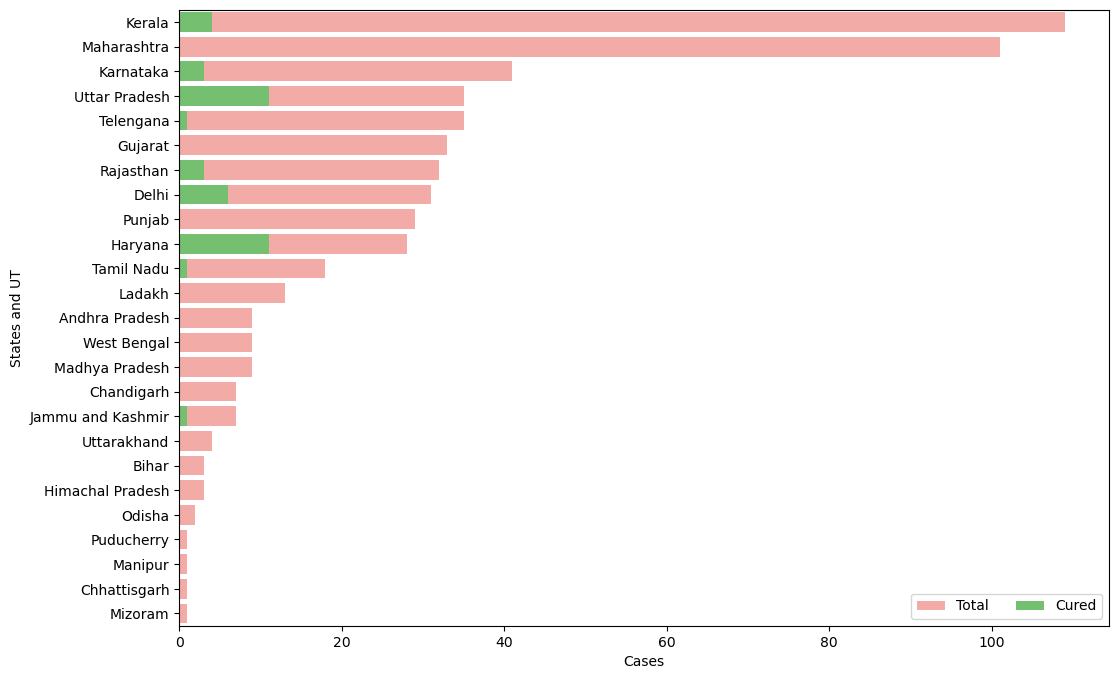

In [199]:
f,ax= plt.subplots(figsize=(12,8))
data = df_india[['Name of State / UT','Total Cases','Cured','Death']]
data.sort_values('Total Cases', ascending=False, inplace = True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases", y="Name of State / UT", data=data, label="Total", color ="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color ="g")

ax.legend(ncol=2, loc="lower right", frameon = True)
ax.set(ylabel="States and UT", xlabel="Cases")

In [201]:
dbd_india = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')

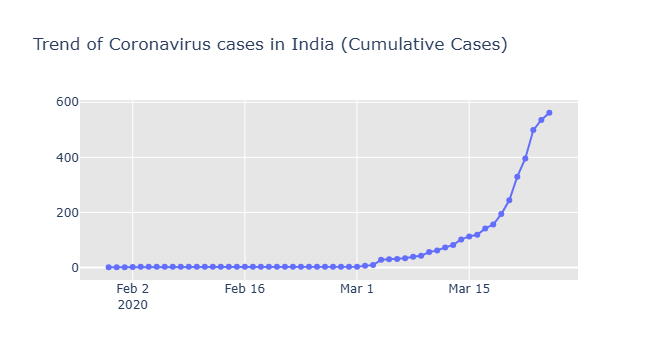

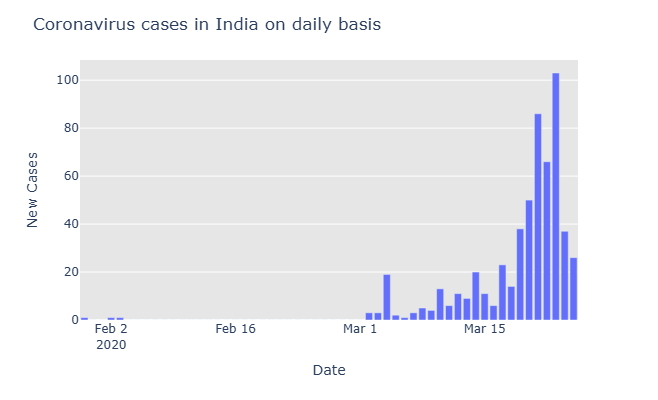

In [203]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_india['Date'], y=dbd_india['Total Cases'], mode='lines+markers', name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus cases in India (Cumulative Cases)', plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_india, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus cases in India on daily basis', plot_bgcolor='rgb(230, 230, 230)')
fig.show()